In [1]:

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers

In [2]:
from tensorflow.keras.datasets import fashion_mnist
import numpy 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images[0].min()

0

In [5]:
train_images[0].max()

255

In [6]:
train_images = train_images.astype('float32')/255 #preprocessing
test_images = test_images.astype('float32')/255

In [7]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [8]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [9]:
train_images[0].shape #next reshape the data because actaul image is very large 

(28, 28, 1)

In [10]:
#data agumentationa technique that artificially increases the(the no of data in datasets) size and diversity of datasets to improve machine learning (ML) model performance.
#flipping/zooming the data
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomFlip(),
    layers.RandomZoom(0.1), 
    layers.RandomTranslation(0.1, 0.1)
])

In [11]:
#building the model, not fitting the test data into model
def create_model():
    inputs = keras.Input(shape=(28,28,1))
    x = data_augmentation(inputs)

    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)


    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)

    residual = x
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.add([x,residual])

    
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)

    model =keras.Model(inputs, outputs)
    return model    

    

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]

In [14]:
model = create_model()

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, callbacks=callbacks, epochs=20, batch_size = 8, validation_data=(test_images, test_labels))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 210s 27ms/step - accuracy: 0.6032 - loss: 1.0564 - val_accuracy: 0.7672 - val_loss: 0.6303
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 199s 27ms/step - accuracy: 0.7556 - loss: 0.6586 - val_accuracy: 0.8098 - val_loss: 0.5666
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 199s 27ms/step - accuracy: 0.7836 - loss: 0.5892 - val_accuracy: 0.8251 - val_loss: 0.5144
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 202s 27ms/step - accuracy: 0.8007 - loss: 0.5470 - val_accuracy: 0.8409 - val_loss: 0.4434
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 203s 27ms/step - accuracy: 0.8111 - loss: 0.5167 - val_accuracy: 0.8297 - val_loss: 0.4663
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 205s 27ms/step - accuracy: 0.8175 - loss: 0.4997 - val_accuracy: 0.8350 - val_loss: 0.4672
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 209s 28ms/step - accuracy: 0.8246 - loss: 0.4810 - val_accuracy: 0.8296 - val_loss: 0.5162
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 206s 27ms/step - accuracy: 

In [18]:
from sklearn.metrics import classification_report

In [19]:
import pprint

In [20]:
y_pred = model.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [21]:
pprint.pprint(classification_report(test_labels, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.86      0.78      0.82      1000\n'
 '           1       0.98      0.97      0.98      1000\n'
 '           2       0.92      0.68      0.78      1000\n'
 '           3       0.86      0.91      0.88      1000\n'
 '           4       0.81      0.75      0.78      1000\n'
 '           5       0.94      0.97      0.95      1000\n'
 '           6       0.59      0.78      0.67      1000\n'
 '           7       0.93      0.92      0.93      1000\n'
 '           8       0.94      0.98      0.96      1000\n'
 '           9       0.96      0.94      0.95      1000\n'
 '\n'
 '    accuracy                           0.87     10000\n'
 '   macro avg       0.88      0.87      0.87     10000\n'
 'weighted avg       0.88      0.87      0.87     10000\n')


In [22]:
import seaborn as sns

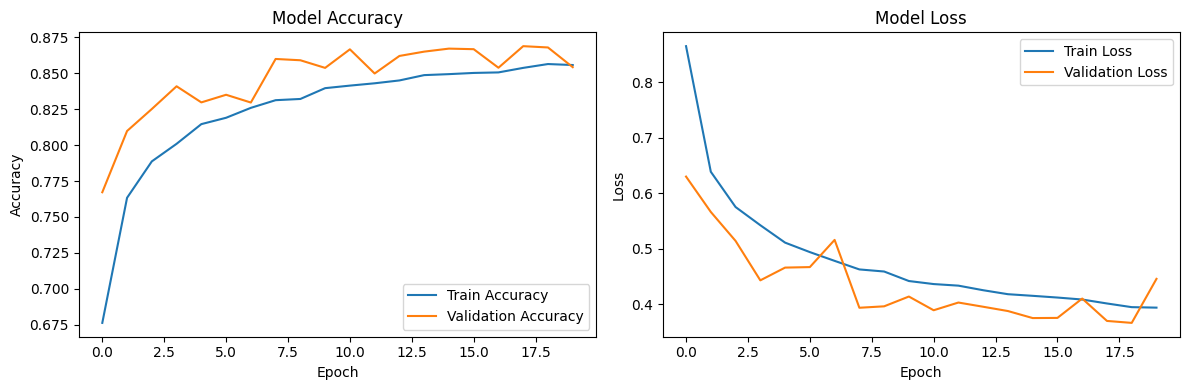

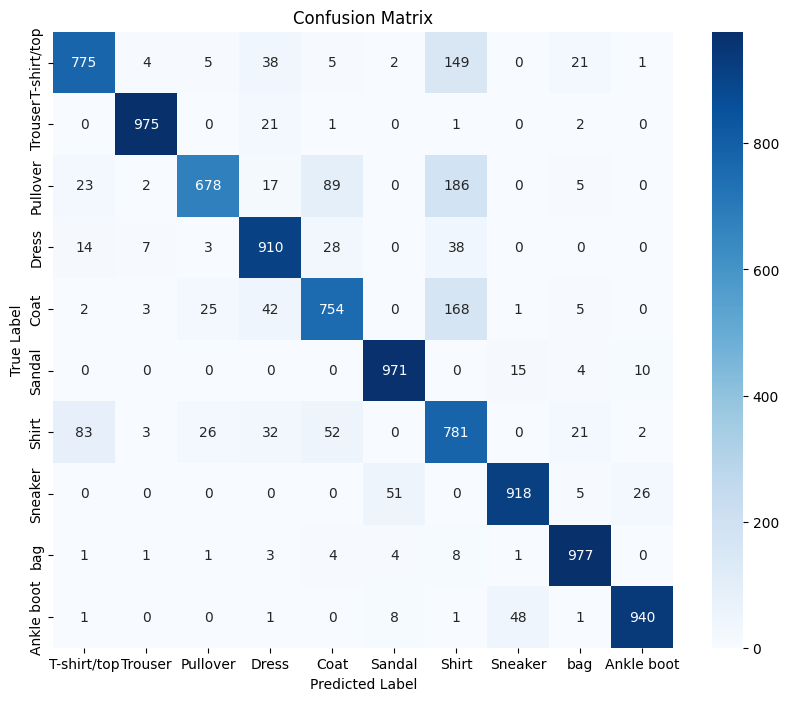

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = tf.math.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Make predictions and plot confusion matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'bag', 'Ankle boot']
plot_confusion_matrix(test_labels, y_pred, class_names)

In [24]:
import numpy as np
from PIL import Image
import tensorflow as tf

def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert to grayscale if it's not already
    if img.mode != 'L':
        img = img.convert('L')
    
    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0
    
    # Reshape to (1, 28, 28, 1) for model input
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

In [25]:
def predict_class(model, image_array):
    # Make prediction
    prediction = model.predict(image_array)
    print(prediction)
    # Get the class with highest probability
    class_index = np.argmax(prediction)

    print(class_index)
    
    # Define class names
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'bag', 'Ankle boot']

    print(len(class_names))
    
    # Get the predicted class name
    predicted_class = class_names[class_index]
    
    # Get the confidence (probability)
    confidence = prediction[0][class_index]
    
    return predicted_class, confidence

In [30]:
# Assume 'model' is your trained model
# Replace 'path_to_your_image.jpg' with the actual path to your image
image_path = 'top.jpg'

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the class
predicted_class, confidence = predict_class(model, processed_image)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[6.25221990e-03 4.23960475e-04 9.15405527e-02 5.47251948e-05
  3.23889172e-03 3.94344141e-07 7.83784270e-01 3.69451802e-09
  1.14704944e-01 7.41394279e-09]]
6
10
Predicted class: Shirt
Confidence: 0.78


In [34]:
# Assume 'model' is your trained model
# Replace 'path_to_your_image.jpg' with the actual path to your image
image_path = 'image.jpg'

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the class
predicted_class, confidence = predict_class(model, processed_image)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1.3072401e-02 1.2068043e-04 5.1490858e-02 3.4760207e-05 2.7776428e-03
  1.0815532e-05 2.2735173e-02 1.8062161e-06 9.0974575e-01 1.0214581e-05]]
8
10
Predicted class: bag
Confidence: 0.91
